In [5]:
import glob
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    reduced_embeddings = pca.fit(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

PCA(n_components=2)
(40152, 256)


AttributeError: 'PCA' object has no attribute 'shape'

In [6]:
import glob
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    pca = pca.fit(embeddings)
    reduced_embeddings = pca.transform(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

[[ 0.5640773  -0.95674455]
 [ 0.94776756 -0.42172286]
 [ 0.71154416 -0.94807374]
 ...
 [-0.20330021 -0.2640486 ]
 [-0.13194938  0.2268037 ]
 [ 0.18290593  0.35803032]]
(40152, 256)
(40152, 2)


[[ 0.56391937 -0.9855942 ]
 [ 0.94769275 -0.43026814]
 [ 0.7114917  -0.9599499 ]
 ...
 [-0.20328327 -0.25014743]
 [-0.13196316  0.24477784]
 [ 0.18306145  0.33041725]]
(40152, 256)
(40152, 2)


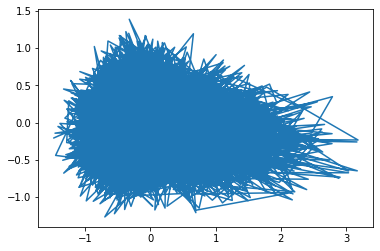

In [7]:
import glob
from matplotlib import pyplot as plt
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    pca = pca.fit(embeddings)
    reduced_embeddings = pca.transform(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    
    plt.plot(*reduced_embeddings.T)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

[[ 0.5638933  -1.0456625 ]
 [ 0.94773525 -0.5540883 ]
 [ 0.7115671  -1.0510447 ]
 ...
 [-0.20324767 -0.21059348]
 [-0.13200697  0.27927774]
 [ 0.18296127  0.35125723]]
(40152, 256)
(40152, 2)


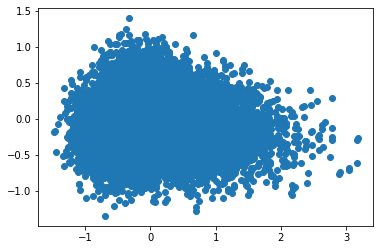

In [8]:
import glob
from matplotlib import pyplot as plt
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    pca = pca.fit(embeddings)
    reduced_embeddings = pca.transform(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    
    plt.scatter(*reduced_embeddings.T)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

[[ 0.5641328  -0.95604795]
 [ 0.9477246  -0.40699655]
 [ 0.7114506  -0.92091644]
 ...
 [-0.20342723 -0.23248653]
 [-0.13189402  0.24069463]
 [ 0.18293205  0.30561286]]
(40152, 256)
(40152, 2)


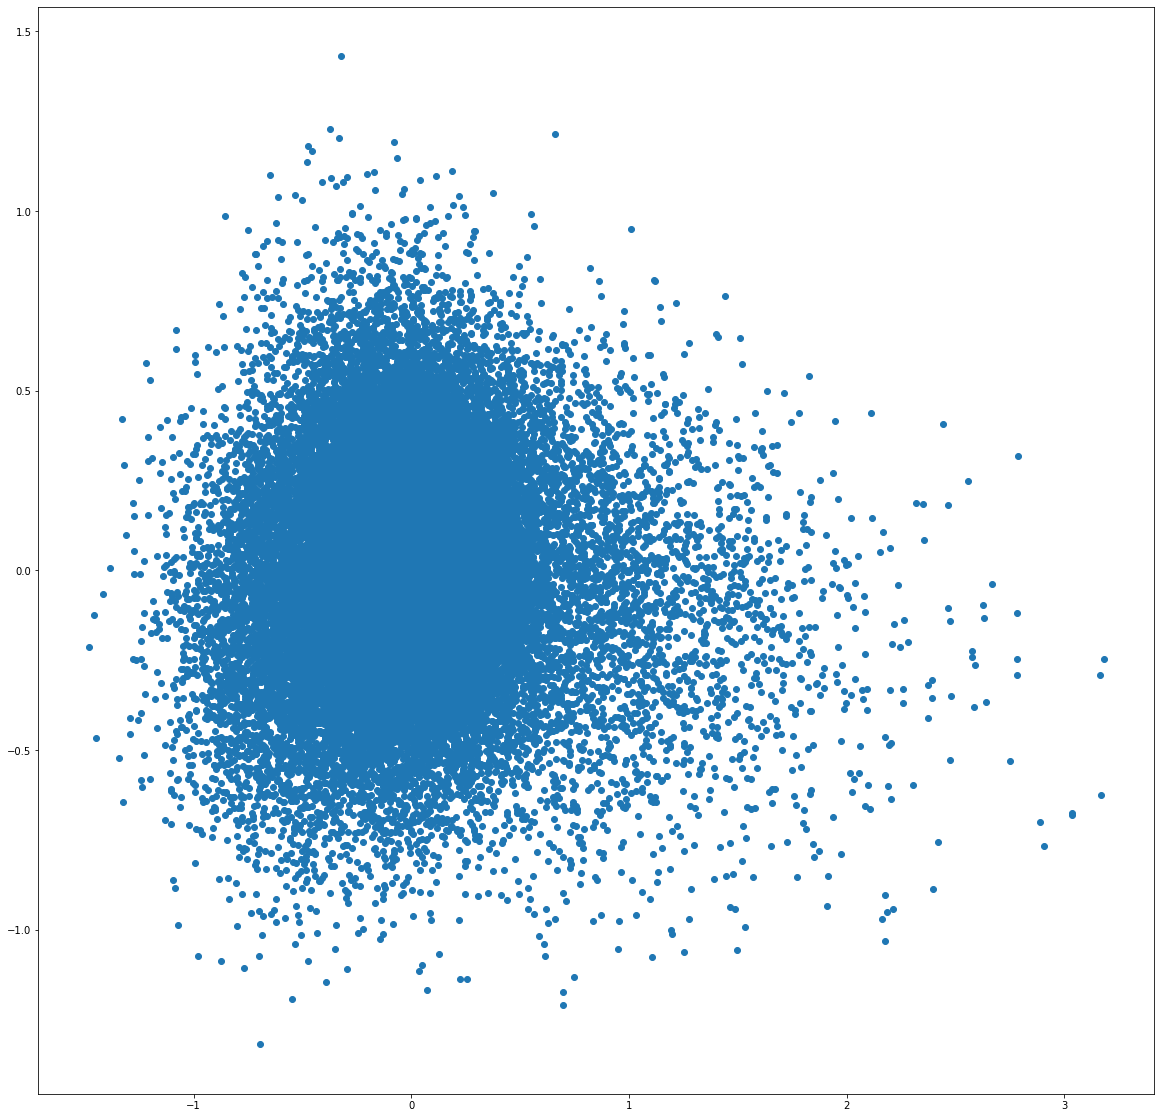

In [9]:
import glob
from matplotlib import pyplot as plt
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    pca = pca.fit(embeddings)
    reduced_embeddings = pca.transform(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    plt.figure(figsize=(20,20))
    plt.scatter(*reduced_embeddings.T)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

In [10]:
import glob
from matplotlib import pyplot as plt
import sklearn.decomposition
import wandb, os
import pytorch_lightning
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from datasets import *
from models import *
from models.EmbeddingsModel import EmbeddingsModel



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = {
    "embeddings_size": int(os.environ.get("embeddings_size", 256)),
    "learning_rate":   float(os.environ.get("learning_rate", 0.0001)),
    "epochs":          int(os.environ.get("epochs", 300)),
    "dropout":         float(os.environ.get("dropout", 0.3)),
    "regularization":  float(os.environ.get("regularization", 0.1)),
    "batch_size":      int(os.environ.get("batch_size", 1024)),
    "val_batch_size":  int(os.environ.get("val_batch_size", 8)),
    "decoder":         str(os.environ.get("decoder", 'DistMultDecoder')),
    'device': 'cuda'
}



if __name__ == '__main__':
    
    data  = MetaQaEmbeddings(config['batch_size'], config['val_batch_size'])

    embeddings_models = glob.glob('./checkpoints/embeddings/**')
    embeddings_models_scores = [re.search(EmbeddingsModel.metric+"=([0-9].[0-9]+)", m).group(1) for m in embeddings_models]
    embeddings_models = list(sorted(zip(embeddings_models_scores,embeddings_models )))
    score, path = (embeddings_models[0])
    model = EmbeddingsModel.load_from_checkpoint(path, )
    
    pca = sklearn.decomposition.PCA(n_components=2)
    embeddings = model.embeddings.detach().numpy()
    pca = pca.fit(embeddings)
    reduced_embeddings = pca.transform(embeddings)
    print(reduced_embeddings)


    print(embeddings.shape)
    print(reduced_embeddings.shape)
    plt.figure(figsize=(200,200))
    plt.scatter(*reduced_embeddings.T)
    # embeddings = embeddings_model.embeddings
            
    # Initialize data and model for pre-training
    
    # wandb.init( project="metaqa", reinit=True)
    # wandb_logger = WandbLogger(log_model=True)
    
                
    # embeddings_checkpoint_callback = ModelCheckpoint(
    #     dirpath='checkpoints/embeddings/',
    #     filename=f'{model.cname()}'+'|{epoch}|{hit@10}'  
    #     )  
    
    # trainer = pytorch_lightning.Trainer( 
    #     ** {'gpus':1, 'auto_select_gpus': True } if config['device'] == 'cuda' else {},
    #     callbacks=[embeddings_checkpoint_callback],
    #     logger= wandb_logger, 
    #     log_every_n_steps=1,
    #     check_val_every_n_epoch=50,
    #     limit_val_batches=1024,
    #     max_epochs=config['epochs'])
    
    # trainer.fit(model, data)
    # wandb.finish()

[[ 0.56408596 -0.99109036]
 [ 0.9479091  -0.47424537]
 [ 0.7116871  -0.96328706]
 ...
 [-0.20328806 -0.22341773]
 [-0.13196765  0.21641164]
 [ 0.1829189   0.34864536]]
(40152, 256)
(40152, 2)
